In [93]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [94]:
from google.colab import files
uploaded = files.upload()

Saving XRP-USD.csv to XRP-USD.csv


In [95]:
import io
df = pd.read_csv("XRP-USD.csv", index_col=0, parse_dates=True)
df.shape
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
...,...,...,...,...,...,...
2023-01-01,0.339923,0.339923,0.336332,0.338763,0.338763,290828851
2023-01-02,0.338774,0.354105,0.321628,0.348556,0.348556,1325787126
2023-01-03,0.348544,0.351049,0.342010,0.343824,0.343824,811872325


Text(0, 0.5, 'ETH-USD Açılış Fiyatları')

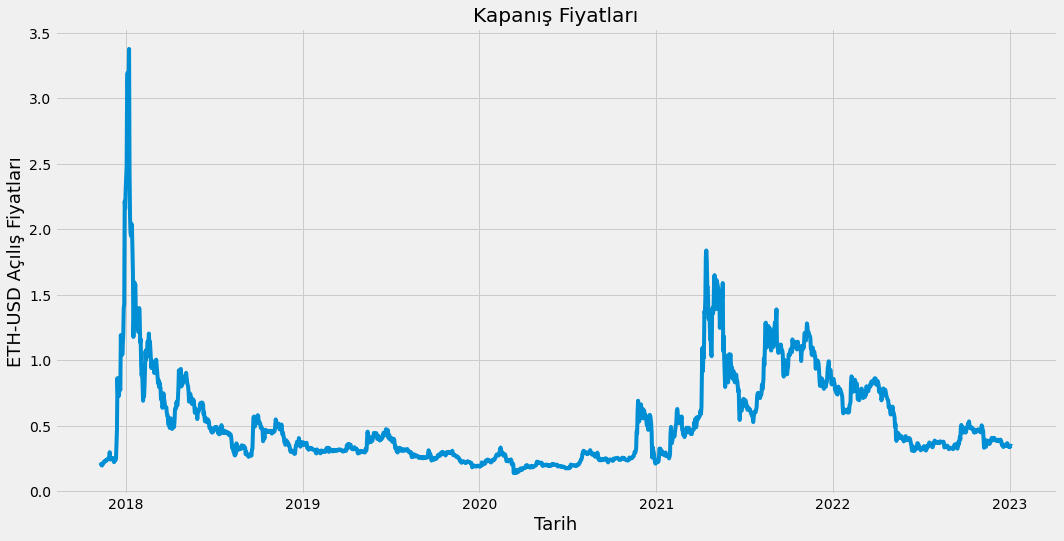

In [96]:
plt.figure(figsize=(16,8))
plt.title("Kapanış Fiyatları")
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('ETH-USD Açılış Fiyatları', fontsize=18)


In [97]:
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1508

In [98]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02404225],
       [0.02064373],
       [0.02186262],
       ...,
       [0.06305681],
       [0.06428281],
       [0.06320721]])

In [99]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.02404225, 0.02064373, 0.02186262, 0.01781991, 0.01970462,
       0.02167579, 0.02264269, 0.02701275, 0.02685031, 0.02748215,
       0.02821991, 0.03061107, 0.02891629, 0.03064195, 0.03173609,
       0.03242783, 0.03482147, 0.03371745, 0.03529519, 0.04926139,
       0.03194052, 0.03435361, 0.03584241, 0.03577849, 0.03487242,
       0.03518525, 0.0328784 , 0.02869178, 0.02568978, 0.0347387 ,
       0.03244822, 0.0301707 , 0.03460468, 0.0722339 , 0.10235024,
       0.22377666, 0.19039922, 0.19115922, 0.18180951, 0.19726296,
       0.20123125, 0.19650853, 0.32531441, 0.30839748, 0.31953338,
       0.27926687, 0.30346877, 0.32421194, 0.38910961, 0.39875702,
       0.64078223, 0.62361824, 0.66733114, 0.69526662, 0.72301991,
       0.91586619, 0.94404873, 0.89836868, 0.91234569, 1.        ])]
[0.7153952457788723]

[array([0.02404225, 0.02064373, 0.02186262, 0.01781991, 0.01970462,
       0.02167579, 0.02264269, 0.02701275, 0.02685031, 0.02748215,
       0.02821991, 0.03061107, 0.028

In [100]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [101]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1448, 60, 1)


In [102]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [103]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [104]:
model.fit(x_train,y_train, batch_size=1,epochs=5)

Epoch 1/5
1448/1448 [==============================] - 42s 27ms/step - loss: 0.0012
Epoch 2/5
1448/1448 [==============================] - 39s 27ms/step - loss: 7.3918e-04
Epoch 3/5
1448/1448 [==============================] - 41s 28ms/step - loss: 5.9778e-04
Epoch 4/5
1448/1448 [==============================] - 41s 28ms/step - loss: 4.5522e-04
Epoch 5/5
1448/1448 [==============================] - 41s 28ms/step - loss: 5.6938e-04


In [105]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
  

In [106]:
x_test = np.array(x_test)

In [107]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [108]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 18ms/step


In [109]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.06309047300338237

<ipython-input-110-87bcbd9c370a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler'] = predictions


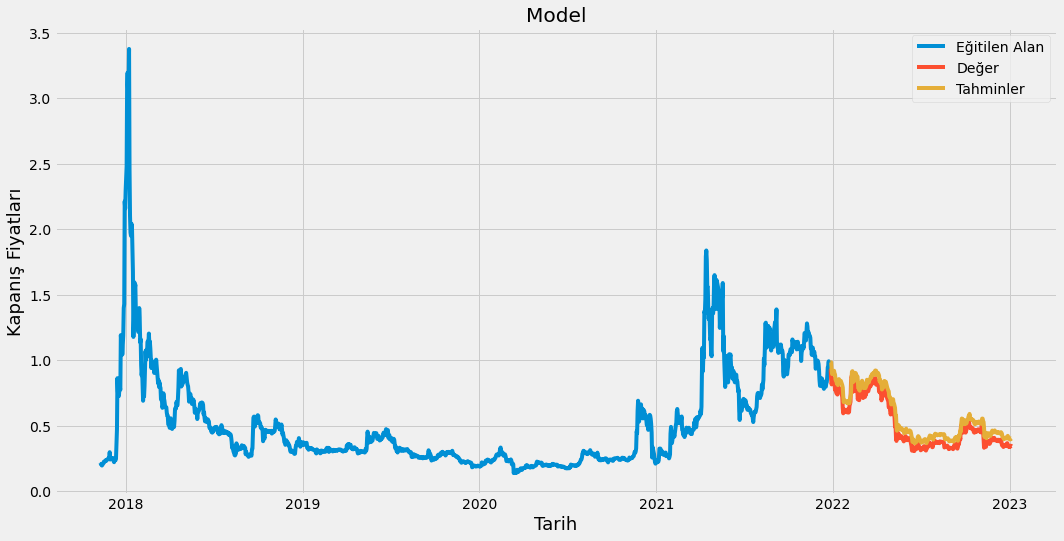

               Close  Tahminler
Date                           
2021-12-26  0.921180   0.982068
2021-12-27  0.926184   0.981631
2021-12-28  0.852960   0.985772
2021-12-29  0.816714   0.931923
2021-12-30  0.839649   0.895312
...              ...        ...
2023-01-01  0.338763   0.398031
2023-01-02  0.348556   0.396091
2023-01-03  0.343824   0.403219
2023-01-04  0.347794   0.401203
2023-01-05  0.344311   0.403446

[376 rows x 2 columns]


In [110]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatları',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Tahminler']])
plt.legend(['Eğitilen Alan','Değer','Tahminler'])
plt.show()
print(valid)